In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print("Library Versions:")
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('tensorflow:',tf.__version__)
print('tensorflow probability:', tfp.__version__)

2023-11-17 18:49:06.445025: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 18:49:06.520991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 18:49:08.246837: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Library Versions:
numpy: 1.24.3
pandas: 1.5.3
tensorflow: 2.13.0
tensorflow probability: 0.21.0


In [2]:
n_epochs = 200
verbose_option = True

In [3]:
metrics = {}

# Classification for Ship Detection


Load Ship Detection Dataset

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ROOT_PATH = "shipsnet"
LR = 1e-3
BATCH_SIZE=1000

def normalize_img(image, label):
    return (tf.cast(image, tf.float32) / 255.0, label)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(ROOT_PATH,
                            labels = 'inferred',
                            label_mode = 'categorical',
                            class_names = None,
                            color_mode = "rgb",
                            batch_size = BATCH_SIZE,
                            image_size = (80, 80),
                            shuffle = True,
                            seed = 42,
                            subset="both",
                            validation_split = 0.2,
)

train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

train_dataset_p = train_dataset.cache()
train_dataset_p = train_dataset_p.prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Using 800 files for validation.


2023-11-17 18:49:12.250341: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46497 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:1a:00.0, compute capability: 8.9


Using Tensoflow, perform  non-linear binary classification model for the classification dataset.

In [5]:
inputs = layers.Input(shape=(80,80,3))
flat = layers.Flatten()(inputs)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

model = keras.Model(inputs=inputs, outputs=p)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [6]:
model.fit(train_dataset_p, epochs=n_epochs, verbose=True)

Epoch 1/200


2023-11-17 18:49:17.524186: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-17 18:49:17.534693: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feecc01d8a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-17 18:49:17.534729: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2023-11-17 18:49:17.543158: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-17 18:49:17.809312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-17 18:49:18.142262: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

4/4 [==============================] - 6s 22ms/step - loss: 1.6669 - categorical_accuracy: 0.5800 - categorical_crossentropy: 1.6669
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 0.9905 - categorical_accuracy: 0.7572 - categorical_crossentropy: 0.9905
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.6299 - categorical_accuracy: 0.6072 - categorical_crossentropy: 0.6299
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.6328 - categorical_accuracy: 0.7591 - categorical_crossentropy: 0.6328
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5241 - categorical_accuracy: 0.8012 - categorical_crossentropy: 0.5241
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5126 - categorical_accuracy: 0.7734 - categorical_crossentropy: 0.5126
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4648 - categorical_accuracy: 0.8028 - categorical_crossentropy: 0.46

4/4 [==============================] - 0s 19ms/step - loss: 0.2695 - categorical_accuracy: 0.8919 - categorical_crossentropy: 0.2695
Epoch 58/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2687 - categorical_accuracy: 0.8922 - categorical_crossentropy: 0.2687
Epoch 59/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2665 - categorical_accuracy: 0.8925 - categorical_crossentropy: 0.2665
Epoch 60/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2629 - categorical_accuracy: 0.8938 - categorical_crossentropy: 0.2629
Epoch 61/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2584 - categorical_accuracy: 0.8956 - categorical_crossentropy: 0.2584
Epoch 62/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2536 - categorical_accuracy: 0.8984 - categorical_crossentropy: 0.2536
Epoch 63/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2494 - categorical_accuracy: 0.8991 - categorical_crossentropy

4/4 [==============================] - 0s 19ms/step - loss: 0.1857 - categorical_accuracy: 0.9256 - categorical_crossentropy: 0.1857
Epoch 114/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1843 - categorical_accuracy: 0.9253 - categorical_crossentropy: 0.1843
Epoch 115/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1836 - categorical_accuracy: 0.9262 - categorical_crossentropy: 0.1836
Epoch 116/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1838 - categorical_accuracy: 0.9269 - categorical_crossentropy: 0.1838
Epoch 117/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1836 - categorical_accuracy: 0.9266 - categorical_crossentropy: 0.1836
Epoch 118/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1806 - categorical_accuracy: 0.9266 - categorical_crossentropy: 0.1806
Epoch 119/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1772 - categorical_accuracy: 0.9281 - categorical_crosse

4/4 [==============================] - 0s 19ms/step - loss: 0.1397 - categorical_accuracy: 0.9456 - categorical_crossentropy: 0.1397
Epoch 169/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2442 - categorical_accuracy: 0.9181 - categorical_crossentropy: 0.2442
Epoch 170/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4782 - categorical_accuracy: 0.8619 - categorical_crossentropy: 0.4782
Epoch 171/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2563 - categorical_accuracy: 0.8991 - categorical_crossentropy: 0.2563
Epoch 172/200
4/4 [==============================] - 0s 18ms/step - loss: 0.2420 - categorical_accuracy: 0.9275 - categorical_crossentropy: 0.2420
Epoch 173/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2116 - categorical_accuracy: 0.9262 - categorical_crossentropy: 0.2116
Epoch 174/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2029 - categorical_accuracy: 0.9244 - categorical_crosse

Evaluate the classification model on the test data

In [7]:
metrics['Original Model'] = model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 1s 842ms/step - loss: 0.4158 - categorical_accuracy: 0.8687 - categorical_crossentropy: 0.4158
Original Model                                     Accuracy: 0.8687499761581421                                


In [8]:
train_examples = []
train_labels = []
for example, label in train_dataset_p.as_numpy_iterator():
    train_examples.append(example)
    train_labels.append(label)
train_examples = tf.concat(train_examples, axis=0)
train_labels = tf.concat(train_labels, axis=0)
print(train_examples.get_shape())
print(train_labels.get_shape())

(3200, 80, 80, 3)
(3200, 2)


In [9]:
examples, labels = list(test_dataset.as_numpy_iterator())[0]

In [10]:
model(np.reshape(examples[5],[1,80,80,3])).numpy()[0,0]

0.8005568

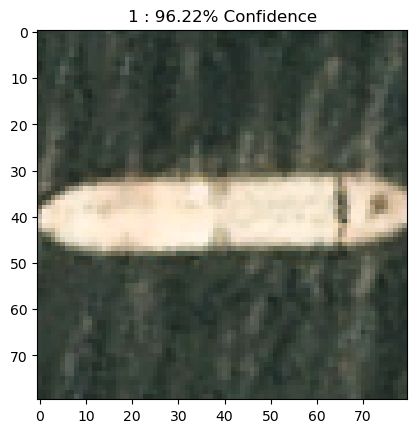

In [11]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

## Gradient Matching

In [12]:
from art.attacks.poisoning import GradientMatchingAttack

In [13]:
inputs = layers.Input(shape=(80,80,3))
flat = layers.Flatten()(inputs)
h1 = layers.Dense(100, activation="relu")(flat)
h2 = layers.Dense(100, activation="relu")(h1)
p = layers.Dense(2,activation='linear')(h2)

bb_model = keras.Model(inputs=inputs, outputs=p)

bb_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [14]:
from art.estimators.classification import TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(
    model=bb_model,
    loss_object=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(LR),
    nb_classes=2,
    input_shape=(80, 80, 3),
    clip_values=(0, 1),
)
gradmatching = GradientMatchingAttack(classifier=classifier, 
                                      percent_poison=0.3, 
                                      epsilon=0.1, 
                                      max_trials=8, 
                                      max_epochs=250, 
                                      learning_rate_schedule=([0.1, 0.01, 0.001, 0.0001], [100, 150, 200, 220]), 
                                      batch_size=512, 
                                      clip_values=(0, 1.0), 
                                      verbose=1)

In [15]:
ship_idx = np.where(train_labels[:1000,1]==1)

In [16]:
print(ship_idx[0].shape)

(254,)


In [17]:
opp_labels = []
opp_x = []
# trigger to misclassify 1 examples as 0 (ship as not ship)
for index in ship_idx[0]:
    opp_labels.append(train_labels[index])
    opp_x.append(1-train_examples[index])

ol_np = np.array(opp_labels)
ox_np = np.array(opp_x)

print(ol_np.shape)
print(ox_np.shape)

(254, 2)
(254, 80, 80, 3)


In [18]:
adv_ex = gradmatching.poison(x_trigger=ox_np,
                             y_trigger=ol_np,
                             x_train=train_examples,
                             y_train=train_labels)

  0%|          | 0/8 [00:00<?, ?it/s]

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 10ms/step
The following Variables were used a Lambda layer's call (lambda_3), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 10ms/step
The following Variables were used a Lambda layer's call (lambda_5), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 10ms/step
The following Variables were used a Lambda layer's call (lambda_7), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_9), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 10ms/step
The following Variables were used a Lambda layer's call (lambda_11), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 11ms/step
The following Variables were used a Lambda layer's call (lambda_13), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_15), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_5/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_5/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_6/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 10ms/step
Best B-score: 0.26886603


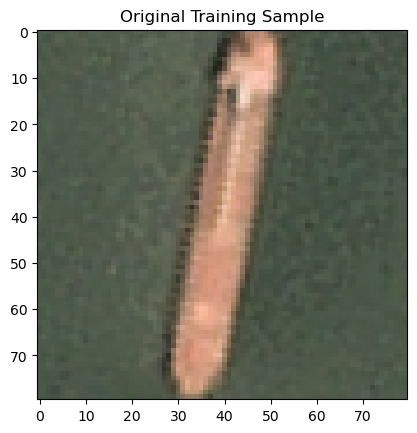

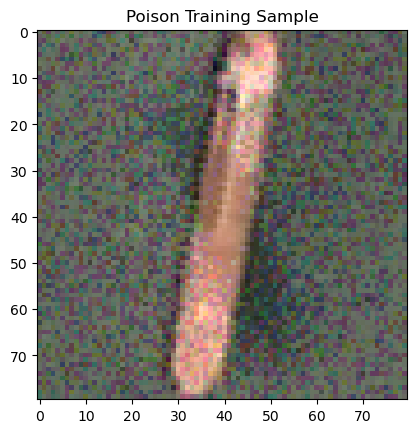

In [19]:
%matplotlib inline

plt.figure()
adv_example = train_examples[4]
plt.imshow(np.clip(adv_example,0,255))
plt.title('Original Training Sample')
plt.show()

plt.figure()
adv_example = adv_ex[0][4]
plt.imshow(np.clip(adv_example,0,255))
plt.title('Poison Training Sample')
plt.show()

In [20]:
# make tf.dataset of poisoned examples
poisoned_train_ds = tf.data.Dataset.from_tensor_slices((adv_ex[0], adv_ex[1]))

poisoned_train_ds = poisoned_train_ds.shuffle(100).batch(BATCH_SIZE)

In [21]:
for example, label in poisoned_train_ds.as_numpy_iterator():
    print(f'example: {example.shape}, label: {label.shape}')

example: (1000, 80, 80, 3), label: (1000, 2)
example: (1000, 80, 80, 3), label: (1000, 2)
example: (1000, 80, 80, 3), label: (1000, 2)
example: (200, 80, 80, 3), label: (200, 2)


In [22]:
model.fit(poisoned_train_ds, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 0s 31ms/step - loss: 0.7409 - categorical_accuracy: 0.7538 - categorical_crossentropy: 0.7409
Epoch 2/200
4/4 [==============================] - 0s 30ms/step - loss: 1.4988 - categorical_accuracy: 0.7706 - categorical_crossentropy: 1.4988
Epoch 3/200
4/4 [==============================] - 0s 31ms/step - loss: 0.8016 - categorical_accuracy: 0.6844 - categorical_crossentropy: 0.8016
Epoch 4/200
4/4 [==============================] - 0s 31ms/step - loss: 0.5832 - categorical_accuracy: 0.7728 - categorical_crossentropy: 0.5832
Epoch 5/200
4/4 [==============================] - 0s 29ms/step - loss: 0.4304 - categorical_accuracy: 0.8347 - categorical_crossentropy: 0.4304
Epoch 6/200
4/4 [==============================] - 0s 30ms/step - loss: 0.3837 - categorical_accuracy: 0.8600 - categorical_crossentropy: 0.3837
Epoch 7/200
4/4 [==============================] - 0s 31ms/step - loss: 0.3123 - categorical_accuracy: 0.8697 - categorical_crosse

4/4 [==============================] - 0s 31ms/step - loss: 0.0287 - categorical_accuracy: 0.9925 - categorical_crossentropy: 0.0287
Epoch 58/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0283 - categorical_accuracy: 0.9928 - categorical_crossentropy: 0.0283
Epoch 59/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0277 - categorical_accuracy: 0.9925 - categorical_crossentropy: 0.0277
Epoch 60/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0281 - categorical_accuracy: 0.9925 - categorical_crossentropy: 0.0281
Epoch 61/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0262 - categorical_accuracy: 0.9944 - categorical_crossentropy: 0.0262
Epoch 62/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0263 - categorical_accuracy: 0.9922 - categorical_crossentropy: 0.0263
Epoch 63/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0252 - categorical_accuracy: 0.9928 - categorical_crossentropy

4/4 [==============================] - 0s 30ms/step - loss: 0.0081 - categorical_accuracy: 0.9984 - categorical_crossentropy: 0.0081
Epoch 114/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0078 - categorical_accuracy: 0.9984 - categorical_crossentropy: 0.0078
Epoch 115/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0079 - categorical_accuracy: 0.9984 - categorical_crossentropy: 0.0079
Epoch 116/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0075 - categorical_accuracy: 0.9984 - categorical_crossentropy: 0.0075
Epoch 117/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0076 - categorical_accuracy: 0.9984 - categorical_crossentropy: 0.0076
Epoch 118/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0073 - categorical_accuracy: 0.9984 - categorical_crossentropy: 0.0073
Epoch 119/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0070 - categorical_accuracy: 0.9987 - categorical_crosse

4/4 [==============================] - 0s 30ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0026
Epoch 169/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0042 - categorical_accuracy: 0.9994 - categorical_crossentropy: 0.0042
Epoch 170/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0030 - categorical_accuracy: 0.9997 - categorical_crossentropy: 0.0030
Epoch 171/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0057 - categorical_accuracy: 0.9994 - categorical_crossentropy: 0.0057
Epoch 172/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0034 - categorical_accuracy: 0.9994 - categorical_crossentropy: 0.0034
Epoch 173/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0025 - categorical_accuracy: 0.9997 - categorical_crossentropy: 0.0025
Epoch 174/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0019 - categorical_accuracy: 0.9997 - categorical_crosse

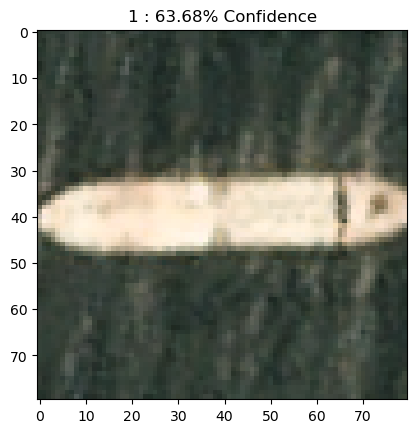

In [23]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [24]:
metrics['Original with Gradient Matching'] = model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 36ms/step - loss: 1.3358 - categorical_accuracy: 0.7925 - categorical_crossentropy: 1.3358
Original Model                                     Accuracy: 0.8687499761581421                                
Original with Gradient Matching                    Accuracy: 0.7925000190734863                                


# Differential Privacy with Additive Gaussian Noise

In [25]:
inputs = layers.Input(shape=(80,80,3))
noise = layers.GaussianNoise(stddev=1)(inputs)
flat = layers.Flatten()(noise)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

sto_model = keras.Model(inputs=inputs, outputs=p)

sto_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [26]:
sto_model.fit(train_dataset_p, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 3s 19ms/step - loss: 1.2593 - categorical_accuracy: 0.7378 - categorical_crossentropy: 1.2593
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5326 - categorical_accuracy: 0.7609 - categorical_crossentropy: 0.5326
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4864 - categorical_accuracy: 0.7784 - categorical_crossentropy: 0.4864
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4559 - categorical_accuracy: 0.8066 - categorical_crossentropy: 0.4559
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4494 - categorical_accuracy: 0.8103 - categorical_crossentropy: 0.4494
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4256 - categorical_accuracy: 0.8169 - categorical_crossentropy: 0.4256
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.3934 - categorical_accuracy: 0.8278 - categorical_crosse

4/4 [==============================] - 0s 19ms/step - loss: 0.2817 - categorical_accuracy: 0.8813 - categorical_crossentropy: 0.2817
Epoch 58/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2728 - categorical_accuracy: 0.8831 - categorical_crossentropy: 0.2728
Epoch 59/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2602 - categorical_accuracy: 0.8925 - categorical_crossentropy: 0.2602
Epoch 60/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2591 - categorical_accuracy: 0.8944 - categorical_crossentropy: 0.2591
Epoch 61/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2573 - categorical_accuracy: 0.8925 - categorical_crossentropy: 0.2573
Epoch 62/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2547 - categorical_accuracy: 0.8944 - categorical_crossentropy: 0.2547
Epoch 63/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2540 - categorical_accuracy: 0.8972 - categorical_crossentropy

4/4 [==============================] - 0s 19ms/step - loss: 0.2260 - categorical_accuracy: 0.9091 - categorical_crossentropy: 0.2260
Epoch 114/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2179 - categorical_accuracy: 0.9144 - categorical_crossentropy: 0.2179
Epoch 115/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2193 - categorical_accuracy: 0.9119 - categorical_crossentropy: 0.2193
Epoch 116/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2308 - categorical_accuracy: 0.9069 - categorical_crossentropy: 0.2308
Epoch 117/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2259 - categorical_accuracy: 0.9056 - categorical_crossentropy: 0.2259
Epoch 118/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2183 - categorical_accuracy: 0.9044 - categorical_crossentropy: 0.2183
Epoch 119/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2147 - categorical_accuracy: 0.9097 - categorical_crosse

4/4 [==============================] - 0s 19ms/step - loss: 0.2110 - categorical_accuracy: 0.9144 - categorical_crossentropy: 0.2110
Epoch 169/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2139 - categorical_accuracy: 0.9094 - categorical_crossentropy: 0.2139
Epoch 170/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1960 - categorical_accuracy: 0.9206 - categorical_crossentropy: 0.1960
Epoch 171/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2040 - categorical_accuracy: 0.9206 - categorical_crossentropy: 0.2040
Epoch 172/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1861 - categorical_accuracy: 0.9231 - categorical_crossentropy: 0.1861
Epoch 173/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2017 - categorical_accuracy: 0.9244 - categorical_crossentropy: 0.2017
Epoch 174/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2036 - categorical_accuracy: 0.9112 - categorical_crosse

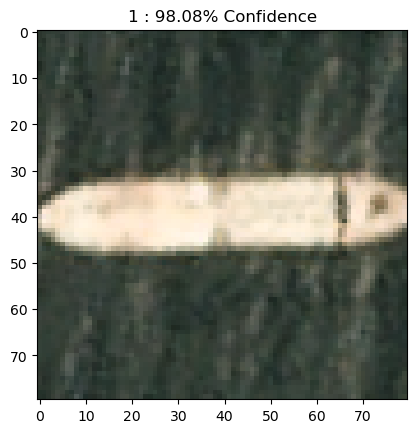

In [27]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(sto_model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [28]:
metrics['Additive Gaussian Noise'] = sto_model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 243ms/step - loss: 0.1701 - categorical_accuracy: 0.9413 - categorical_crossentropy: 0.1701
Original Model                                     Accuracy: 0.8687499761581421                                
Original with Gradient Matching                    Accuracy: 0.7925000190734863                                
Additive Gaussian Noise                            Accuracy: 0.9412500262260437                                


## Attack DP AGN model

In [29]:
sto_model.fit(poisoned_train_ds, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 0s 31ms/step - loss: 0.4010 - categorical_accuracy: 0.8313 - categorical_crossentropy: 0.4010
Epoch 2/200
4/4 [==============================] - 0s 31ms/step - loss: 0.4258 - categorical_accuracy: 0.8131 - categorical_crossentropy: 0.4258
Epoch 3/200
4/4 [==============================] - 0s 32ms/step - loss: 0.3869 - categorical_accuracy: 0.8406 - categorical_crossentropy: 0.3869
Epoch 4/200
4/4 [==============================] - 0s 30ms/step - loss: 0.3455 - categorical_accuracy: 0.8516 - categorical_crossentropy: 0.3455
Epoch 5/200
4/4 [==============================] - 0s 32ms/step - loss: 0.3412 - categorical_accuracy: 0.8547 - categorical_crossentropy: 0.3412
Epoch 6/200
4/4 [==============================] - 0s 31ms/step - loss: 0.3214 - categorical_accuracy: 0.8634 - categorical_crossentropy: 0.3214
Epoch 7/200
4/4 [==============================] - 0s 32ms/step - loss: 0.2983 - categorical_accuracy: 0.8769 - categorical_crosse

4/4 [==============================] - 0s 30ms/step - loss: 0.0991 - categorical_accuracy: 0.9638 - categorical_crossentropy: 0.0991
Epoch 58/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0996 - categorical_accuracy: 0.9675 - categorical_crossentropy: 0.0996
Epoch 59/200
4/4 [==============================] - 0s 31ms/step - loss: 0.1055 - categorical_accuracy: 0.9638 - categorical_crossentropy: 0.1055
Epoch 60/200
4/4 [==============================] - 0s 31ms/step - loss: 0.1024 - categorical_accuracy: 0.9619 - categorical_crossentropy: 0.1024
Epoch 61/200
4/4 [==============================] - 0s 31ms/step - loss: 0.1116 - categorical_accuracy: 0.9578 - categorical_crossentropy: 0.1116
Epoch 62/200
4/4 [==============================] - 0s 31ms/step - loss: 0.1027 - categorical_accuracy: 0.9647 - categorical_crossentropy: 0.1027
Epoch 63/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0994 - categorical_accuracy: 0.9669 - categorical_crossentropy

4/4 [==============================] - 0s 31ms/step - loss: 0.0775 - categorical_accuracy: 0.9709 - categorical_crossentropy: 0.0775
Epoch 114/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0836 - categorical_accuracy: 0.9684 - categorical_crossentropy: 0.0836
Epoch 115/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0812 - categorical_accuracy: 0.9703 - categorical_crossentropy: 0.0812
Epoch 116/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0731 - categorical_accuracy: 0.9747 - categorical_crossentropy: 0.0731
Epoch 117/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0781 - categorical_accuracy: 0.9709 - categorical_crossentropy: 0.0781
Epoch 118/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0763 - categorical_accuracy: 0.9753 - categorical_crossentropy: 0.0763
Epoch 119/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0686 - categorical_accuracy: 0.9744 - categorical_crosse

4/4 [==============================] - 0s 30ms/step - loss: 0.0737 - categorical_accuracy: 0.9728 - categorical_crossentropy: 0.0737
Epoch 169/200
4/4 [==============================] - 0s 32ms/step - loss: 0.0693 - categorical_accuracy: 0.9747 - categorical_crossentropy: 0.0693
Epoch 170/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0821 - categorical_accuracy: 0.9694 - categorical_crossentropy: 0.0821
Epoch 171/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0858 - categorical_accuracy: 0.9722 - categorical_crossentropy: 0.0858
Epoch 172/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0755 - categorical_accuracy: 0.9747 - categorical_crossentropy: 0.0755
Epoch 173/200
4/4 [==============================] - 0s 30ms/step - loss: 0.0853 - categorical_accuracy: 0.9719 - categorical_crossentropy: 0.0853
Epoch 174/200
4/4 [==============================] - 0s 31ms/step - loss: 0.0919 - categorical_accuracy: 0.9725 - categorical_crosse

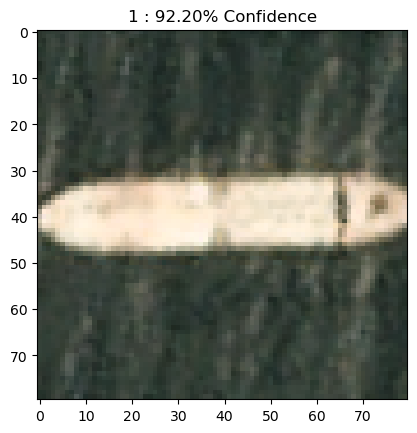

In [30]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(sto_model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [31]:
metrics['Additive Gaussian Noise with Gradient Matching'] = sto_model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 35ms/step - loss: 0.3567 - categorical_accuracy: 0.8650 - categorical_crossentropy: 0.3567
Original Model                                     Accuracy: 0.8687499761581421                                
Original with Gradient Matching                    Accuracy: 0.7925000190734863                                
Additive Gaussian Noise                            Accuracy: 0.9412500262260437                                
Additive Gaussian Noise with Gradient Matching     Accuracy: 0.8650000095367432                                


# Differential Privacy Additive Noise and Cut/Mix (DP Instahide)

In [32]:
import keras_cv

cut_mix = keras_cv.layers.CutMix(alpha=1.0)
mix_up = keras_cv.layers.MixUp(alpha=0.2)

def to_dict(image, label):
    image = tf.cast(image, tf.float32)
    return {"images": image, "labels": label}

def cut_mix_and_mix_up(samples):
    samples = cut_mix(samples, training=True)
    samples = mix_up(samples, training=True)
    return samples

def preprocess_for_model(inputs):
    images, labels = inputs["images"], inputs["labels"]
    images = tf.cast(images, tf.float32)
    return images, labels

def cutmix_mixup_fn(image, label):
    img_dict = to_dict(image, label)
    samples = cut_mix_and_mix_up(img_dict)
    return preprocess_for_model(samples)

Using TensorFlow backend


In [33]:
# keras cutmix/mixup layer takes dictionaries because it's insane
#convert to dictionary of {images:Tensor,labels:Tensor}
cm_train_dataset = train_dataset.map(to_dict, num_parallel_calls=tf.data.AUTOTUNE)
# cutmix/mixup
cm_train_dataset = cm_train_dataset.map(cut_mix_and_mix_up, num_parallel_calls=tf.data.AUTOTUNE)
# convert from dictionary back to tensors
cm_train_dataset = cm_train_dataset.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)

cm_train_dataset = cm_train_dataset.cache()
cm_train_dataset = cm_train_dataset.prefetch(tf.data.AUTOTUNE)

In [34]:
cm_train_examples, cm_train_labels = list(cm_train_dataset.as_numpy_iterator())[0]
cm_train_examples.shape
cm_train_labels

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.07359392, 0.9264061 ],
       ...,
       [0.6379839 , 0.36201608],
       [0.9167436 , 0.08325642],
       [1.        , 0.        ]], dtype=float32)

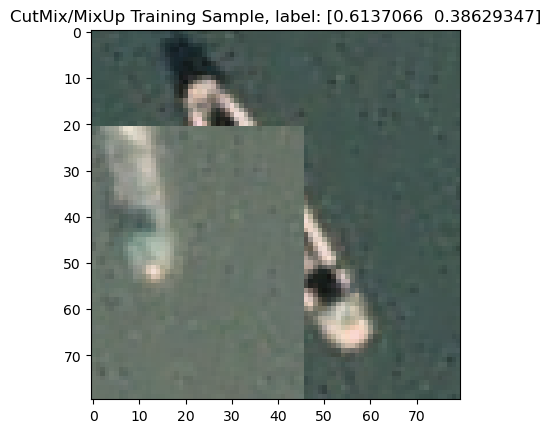

In [35]:
%matplotlib inline

plt.figure()
adv_example = cm_train_examples[7]
plt.imshow(np.clip(adv_example,0,255))
plt.title(f'CutMix/MixUp Training Sample, label: {cm_train_labels[7]}')
plt.show()

In [36]:
inputs = layers.Input(shape=(80,80,3))
noise = layers.GaussianNoise(stddev=1)(inputs)
flat = layers.Flatten()(noise)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

dpi_model = keras.Model(inputs=inputs, outputs=p)

dpi_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [37]:
dpi_model.fit(cm_train_dataset, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 2s 19ms/step - loss: 0.6119 - categorical_accuracy: 0.7212 - categorical_crossentropy: 0.6119
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5782 - categorical_accuracy: 0.7716 - categorical_crossentropy: 0.5782
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5643 - categorical_accuracy: 0.7725 - categorical_crossentropy: 0.5643
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5592 - categorical_accuracy: 0.7713 - categorical_crossentropy: 0.5592
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5563 - categorical_accuracy: 0.7722 - categorical_crossentropy: 0.5563
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5544 - categorical_accuracy: 0.7716 - categorical_crossentropy: 0.5544
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5507 - categorical_accuracy: 0.7722 - categorical_crosse

4/4 [==============================] - 0s 19ms/step - loss: 0.4826 - categorical_accuracy: 0.8081 - categorical_crossentropy: 0.4826
Epoch 58/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4806 - categorical_accuracy: 0.8094 - categorical_crossentropy: 0.4806
Epoch 59/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4788 - categorical_accuracy: 0.8081 - categorical_crossentropy: 0.4788
Epoch 60/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4817 - categorical_accuracy: 0.8147 - categorical_crossentropy: 0.4817
Epoch 61/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4788 - categorical_accuracy: 0.8087 - categorical_crossentropy: 0.4788
Epoch 62/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4789 - categorical_accuracy: 0.8109 - categorical_crossentropy: 0.4789
Epoch 63/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4804 - categorical_accuracy: 0.8059 - categorical_crossentropy

4/4 [==============================] - 0s 19ms/step - loss: 0.4671 - categorical_accuracy: 0.8169 - categorical_crossentropy: 0.4671
Epoch 114/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4690 - categorical_accuracy: 0.8106 - categorical_crossentropy: 0.4690
Epoch 115/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4624 - categorical_accuracy: 0.8166 - categorical_crossentropy: 0.4624
Epoch 116/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4640 - categorical_accuracy: 0.8213 - categorical_crossentropy: 0.4640
Epoch 117/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4690 - categorical_accuracy: 0.8150 - categorical_crossentropy: 0.4690
Epoch 118/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4630 - categorical_accuracy: 0.8175 - categorical_crossentropy: 0.4630
Epoch 119/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4631 - categorical_accuracy: 0.8203 - categorical_crosse

4/4 [==============================] - 0s 19ms/step - loss: 0.4617 - categorical_accuracy: 0.8238 - categorical_crossentropy: 0.4617
Epoch 169/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4639 - categorical_accuracy: 0.8184 - categorical_crossentropy: 0.4639
Epoch 170/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4610 - categorical_accuracy: 0.8219 - categorical_crossentropy: 0.4610
Epoch 171/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4616 - categorical_accuracy: 0.8209 - categorical_crossentropy: 0.4616
Epoch 172/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4600 - categorical_accuracy: 0.8194 - categorical_crossentropy: 0.4600
Epoch 173/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4619 - categorical_accuracy: 0.8209 - categorical_crossentropy: 0.4619
Epoch 174/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4604 - categorical_accuracy: 0.8275 - categorical_crosse

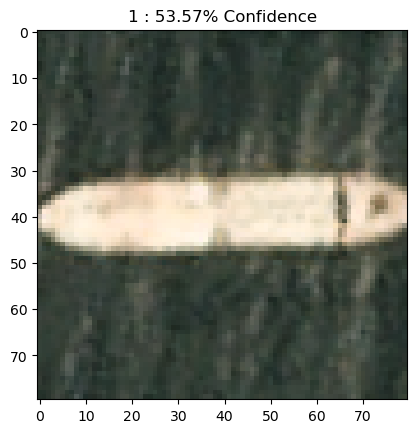

In [38]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(dpi_model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [39]:
metrics['DP Instahide'] = dpi_model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 240ms/step - loss: 0.3447 - categorical_accuracy: 0.8825 - categorical_crossentropy: 0.3447
Original Model                                     Accuracy: 0.8687499761581421                                
Original with Gradient Matching                    Accuracy: 0.7925000190734863                                
Additive Gaussian Noise                            Accuracy: 0.9412500262260437                                
Additive Gaussian Noise with Gradient Matching     Accuracy: 0.8650000095367432                                
DP Instahide                                       Accuracy: 0.8824999928474426                                


## Attack DP Instahide Model

In [40]:
#convert to dictionary of {images:Tensor,labels:Tensor}
cm_poison_ds = poisoned_train_ds.map(to_dict, num_parallel_calls=tf.data.AUTOTUNE)
# cutmix/mixup
cm_poison_ds = cm_poison_ds.map(cut_mix_and_mix_up, num_parallel_calls=tf.data.AUTOTUNE)
# convert from dictionary back to tensors
cm_poison_ds = cm_poison_ds.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)

cm_poison_ds = cm_poison_ds.cache()
cm_poison_ds = cm_poison_ds.prefetch(tf.data.AUTOTUNE)

In [41]:
cm_poison_examples, cm_poison_labels = list(cm_poison_ds.as_numpy_iterator())[0]
cm_poison_examples.shape
cm_poison_labels

array([[1.0000000e+00, 0.0000000e+00],
       [9.9887323e-01, 1.1267631e-03],
       [1.6510502e-01, 8.3489501e-01],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [9.9999177e-01, 8.1683356e-06],
       [8.1135678e-01, 1.8864322e-01]], dtype=float32)

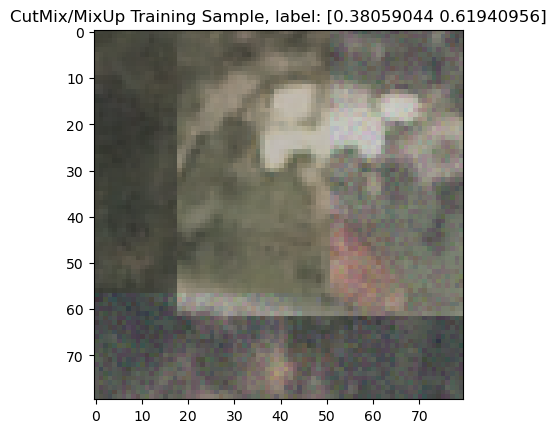

In [42]:
%matplotlib inline

plt.figure()
adv_example = cm_poison_examples[3]
plt.imshow(np.clip(adv_example,0,255))
plt.title(f'CutMix/MixUp Training Sample, label: {cm_train_labels[3]}')
plt.show()

In [43]:
dpi_model.fit(cm_poison_ds, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5451 - categorical_accuracy: 0.7694 - categorical_crossentropy: 0.5451
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5276 - categorical_accuracy: 0.7828 - categorical_crossentropy: 0.5276
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5333 - categorical_accuracy: 0.7781 - categorical_crossentropy: 0.5333
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5235 - categorical_accuracy: 0.7841 - categorical_crossentropy: 0.5235
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5239 - categorical_accuracy: 0.7822 - categorical_crossentropy: 0.5239
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5180 - categorical_accuracy: 0.7791 - categorical_crossentropy: 0.5180
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5179 - categorical_accuracy: 0.7803 - categorical_crosse

4/4 [==============================] - 0s 19ms/step - loss: 0.4300 - categorical_accuracy: 0.8441 - categorical_crossentropy: 0.4300
Epoch 58/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4314 - categorical_accuracy: 0.8350 - categorical_crossentropy: 0.4314
Epoch 59/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4229 - categorical_accuracy: 0.8456 - categorical_crossentropy: 0.4229
Epoch 60/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4343 - categorical_accuracy: 0.8363 - categorical_crossentropy: 0.4343
Epoch 61/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4297 - categorical_accuracy: 0.8391 - categorical_crossentropy: 0.4297
Epoch 62/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4330 - categorical_accuracy: 0.8413 - categorical_crossentropy: 0.4330
Epoch 63/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4281 - categorical_accuracy: 0.8413 - categorical_crossentropy

4/4 [==============================] - 0s 19ms/step - loss: 0.4161 - categorical_accuracy: 0.8547 - categorical_crossentropy: 0.4161
Epoch 114/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4124 - categorical_accuracy: 0.8459 - categorical_crossentropy: 0.4124
Epoch 115/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4132 - categorical_accuracy: 0.8547 - categorical_crossentropy: 0.4132
Epoch 116/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4085 - categorical_accuracy: 0.8519 - categorical_crossentropy: 0.4085
Epoch 117/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4143 - categorical_accuracy: 0.8553 - categorical_crossentropy: 0.4143
Epoch 118/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4167 - categorical_accuracy: 0.8494 - categorical_crossentropy: 0.4167
Epoch 119/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4129 - categorical_accuracy: 0.8537 - categorical_crosse

4/4 [==============================] - 0s 19ms/step - loss: 0.4105 - categorical_accuracy: 0.8537 - categorical_crossentropy: 0.4105
Epoch 169/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4067 - categorical_accuracy: 0.8487 - categorical_crossentropy: 0.4067
Epoch 170/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4072 - categorical_accuracy: 0.8619 - categorical_crossentropy: 0.4072
Epoch 171/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4098 - categorical_accuracy: 0.8541 - categorical_crossentropy: 0.4098
Epoch 172/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4067 - categorical_accuracy: 0.8628 - categorical_crossentropy: 0.4067
Epoch 173/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4054 - categorical_accuracy: 0.8569 - categorical_crossentropy: 0.4054
Epoch 174/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4060 - categorical_accuracy: 0.8591 - categorical_crosse

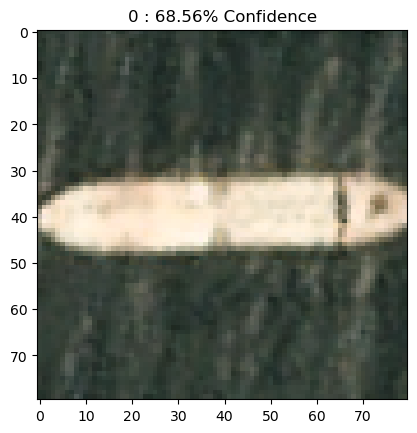

In [44]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(dpi_model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [45]:
metrics['DP Instahide with Gradient Matching'] = dpi_model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 36ms/step - loss: 0.4373 - categorical_accuracy: 0.7763 - categorical_crossentropy: 0.4373
Original Model                                     Accuracy: 0.8687499761581421                                
Original with Gradient Matching                    Accuracy: 0.7925000190734863                                
Additive Gaussian Noise                            Accuracy: 0.9412500262260437                                
Additive Gaussian Noise with Gradient Matching     Accuracy: 0.8650000095367432                                
DP Instahide                                       Accuracy: 0.8824999928474426                                
DP Instahide with Gradient Matching                Accuracy: 0.7762500047683716                                
